# Fraud Detection with Decision Tree CART

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, average_precision_score,  precision_recall_curve


# Data Collection and Investigation

In [2]:
# Input data files are available in the "../input/" directory
df = pd.read_csv('D:/Python Project/Kaggle/input/creditcard.csv')

# printing the first 5 columns for data visualization 
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checks how many fraud in this dataset
print(df['Class'].value_counts())

print('\nFraud is {}% of our data.'.format(df['Class'].value_counts()[1] / float(df['Class'].value_counts()[0])*100))


0    284315
1       492
Name: Class, dtype: int64

Fraud is 0.17304750013189596% of our data.


Conclusion = Imbalance. Learning of the data might bias 

## Preparing train and test dataset
### Dimension extraction
Now extract Time to Amount as features. Due to privacy, denoted as Vn <br>
Class as target <br>
Drop time and standardize amount value before do PCA

In [4]:
df.drop(["Time"], axis=1, inplace=True)
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [5]:
features = df.iloc[:, df.columns != 'Class']
target = df.iloc[:, df.columns == 'Class']

features.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


## Train Test Split

Now split the original dataset into train and test with stratify enable to target class.<br><br>
The purpose of stratify is to __ensure that in each split must at least got one Fraud__ to counter the problem of higly skewed. <br>
For example, if there are 25% of fraud and 75% of non-fraud, stratify will make sure that your random split has 25% of fraud and 75% of non-fraud.
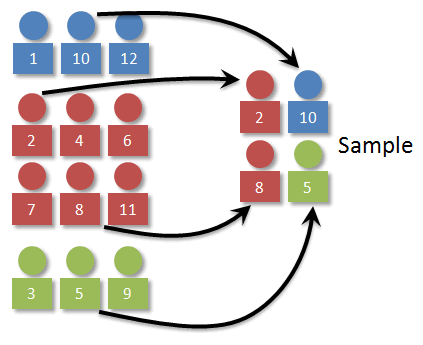

Random State aims to shuffle and split data randomly __and guarantee that the output of Split 1 will be equal to the output of Split 2__. <br>
__The order in which x_train and y_train will not be change__ <br>
__Used for reproducing problem the same every time it is run__ <br>
Without random state, everytime run it , it will get a different ordering result <br>
0 or 42 is best practices
https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

print("Total numbers of original dataset", len(x_train)+len(x_test))
print("Splited numbers of training data", len(x_train))
print("Splited numbers of test data", len(x_test))

print("\nTraining set")
print("==================")
print("Total number of legal transaction in training set", y_train['Class'].value_counts()[0])
print("Total number of fraud in training set", y_train['Class'].value_counts()[1], "\n")

print("Testing set")
print("==================")
print("Total number of legal transaction in testing set", y_test['Class'].value_counts()[0])
print("Total number of fraud in testing set", y_test['Class'].value_counts()[1])


Total numbers of original dataset 284807
Splited numbers of training data 227845
Splited numbers of test data 56962

Training set
Total number of legal transaction in training set 227451
Total number of fraud in training set 394 

Testing set
Total number of legal transaction in testing set 56864
Total number of fraud in testing set 98


# Model Building
For this notebook / python, used Decision Tree CART as ML model.


## Train the model
Then we can now start evaluate prediction skill by using the testing set

In [7]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train.values.ravel())

y_prediction = model.predict(x_test)


## Evaluating Model Performance

After train and fit, take a look at confusion matrix, which is a table that is often used to describe the performance of a classification model

1. __True Positives (TP)__
True positives are the cases when the actual class of the data point was 1(Fraud) and the predicted is also 1(Fraud)
<br>
2. __True Negatives (TN)__
True negatives are the cases when the actual class of the data point was 0(Legitimate) and the predicted is also 0(Legitimate)
<br>
3. __False Positives (FP)__
False positives are the cases when the actual class of the data point was 0(Legitimate) and the predicted is 1(Fraud). 
Because the model has predicted incorrectly as a positive (Fraud)
<br>
4. __False Negatives (FN)__
False negatives are the cases when the actual class of the data point was 1(Fraud) and the predicted is 0(Legitimate).
Because the model has predicted incorrectly as a negative (Legitimate)

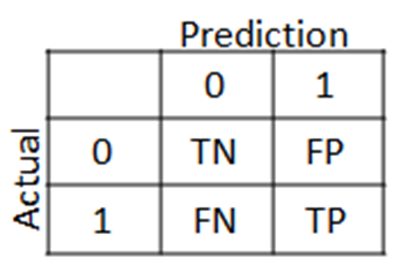

### Score Metrics Description
1. __Accuracy__ = Measure of how many correct predictions made by the model, fraud and not fraud 
2. __Precision__ = Measure of how many actual frauds caught compared to number of all returned results
3. __Recall__ = Measure of how many frauds caught compared to the number of actual frauds
4. __f1-score__ = Gives the harmonic mean of precision and recall.  2*(Recall * Precision) / (Recall + Precision)


In [8]:
dt_accuracy_score = accuracy_score(y_test, y_prediction) * 100
dt_precison_score = precision_score(y_test, y_prediction) * 100
dt_recall_score = recall_score(y_test, y_prediction) * 100
dt_f1_score = f1_score(y_test, y_prediction) * 100

print("Scores in %")
print("===============================")
print("Accuracy : ", dt_accuracy_score)
print("Precison : ", dt_precison_score)
print("Recall   : ", dt_recall_score)
print("F1       : ", dt_f1_score)


Scores in %
Accuracy :  99.91924440855307
Precison :  76.0
Recall   :  77.55102040816327
F1       :  76.76767676767676


In [9]:
from sklearn.metrics import classification_report, mean_absolute_error
print('---Classification Report---')
print(classification_report(y_test, y_prediction))

print("Model Mean Absolute Error {}".format(mean_absolute_error(y_test, y_prediction)))


---Classification Report---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.76      0.78      0.77        98

avg / total       1.00      1.00      1.00     56962

Model Mean Absolute Error 0.0008075559144692953


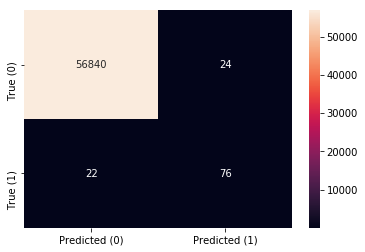

In [10]:
#generate confusion matrix
cfm = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cfm, index = ['True (0)', 'True (1)'])
df_cm.columns = ['Predicted (0)', 'Predicted (1)']
sns.heatmap(df_cm, annot=True, fmt="d")

tn = cfm[0][0]
fp = cfm[0][1]
tp = cfm[1][1]
fn = cfm[1][0]


In [11]:
# Use cross-validation to check over-fitting
precision = cross_val_score(model, features, target, cv=5, scoring='precision', n_jobs = -1)
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))


Precision: 0.59 (+/- 0.36)


### Plot precision-recall curve
predict_proba is to calculate the posterior probability of the class label <br>
For example, if the probability of occurance of 0 is 0.237, then 1 is 0.762

Text(0.5,1,'2-class Precision-Recall curve: AP=0.59')

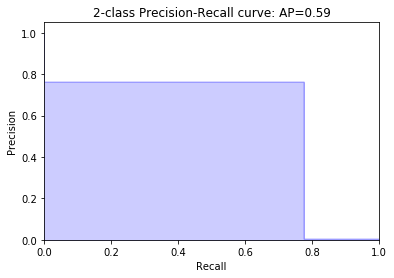

In [12]:
# Plot precision-recall curve
probas = model.predict_proba(x_test)[:,-1]
average_precision = average_precision_score(y_test, probas)
precision, recall, _ = precision_recall_curve(y_test, probas)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

### Plot the learning curve

<module 'matplotlib.pyplot' from 'd:\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

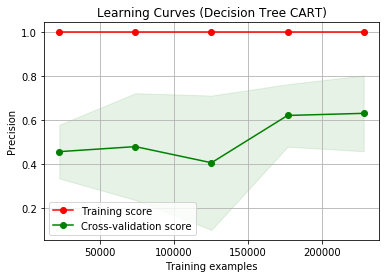

In [13]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Precision")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring ='precision')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Decision Tree CART)"
estimator = model
plot_learning_curve(estimator, title, features, target, cv=5, n_jobs = -1)


# Create a visualization for Decision Tree CART 

In [14]:
import os
import pydotplus

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from collections import Counter

os.environ["PATH"] += os.pathsep + 'D:/Graphviz/bin'


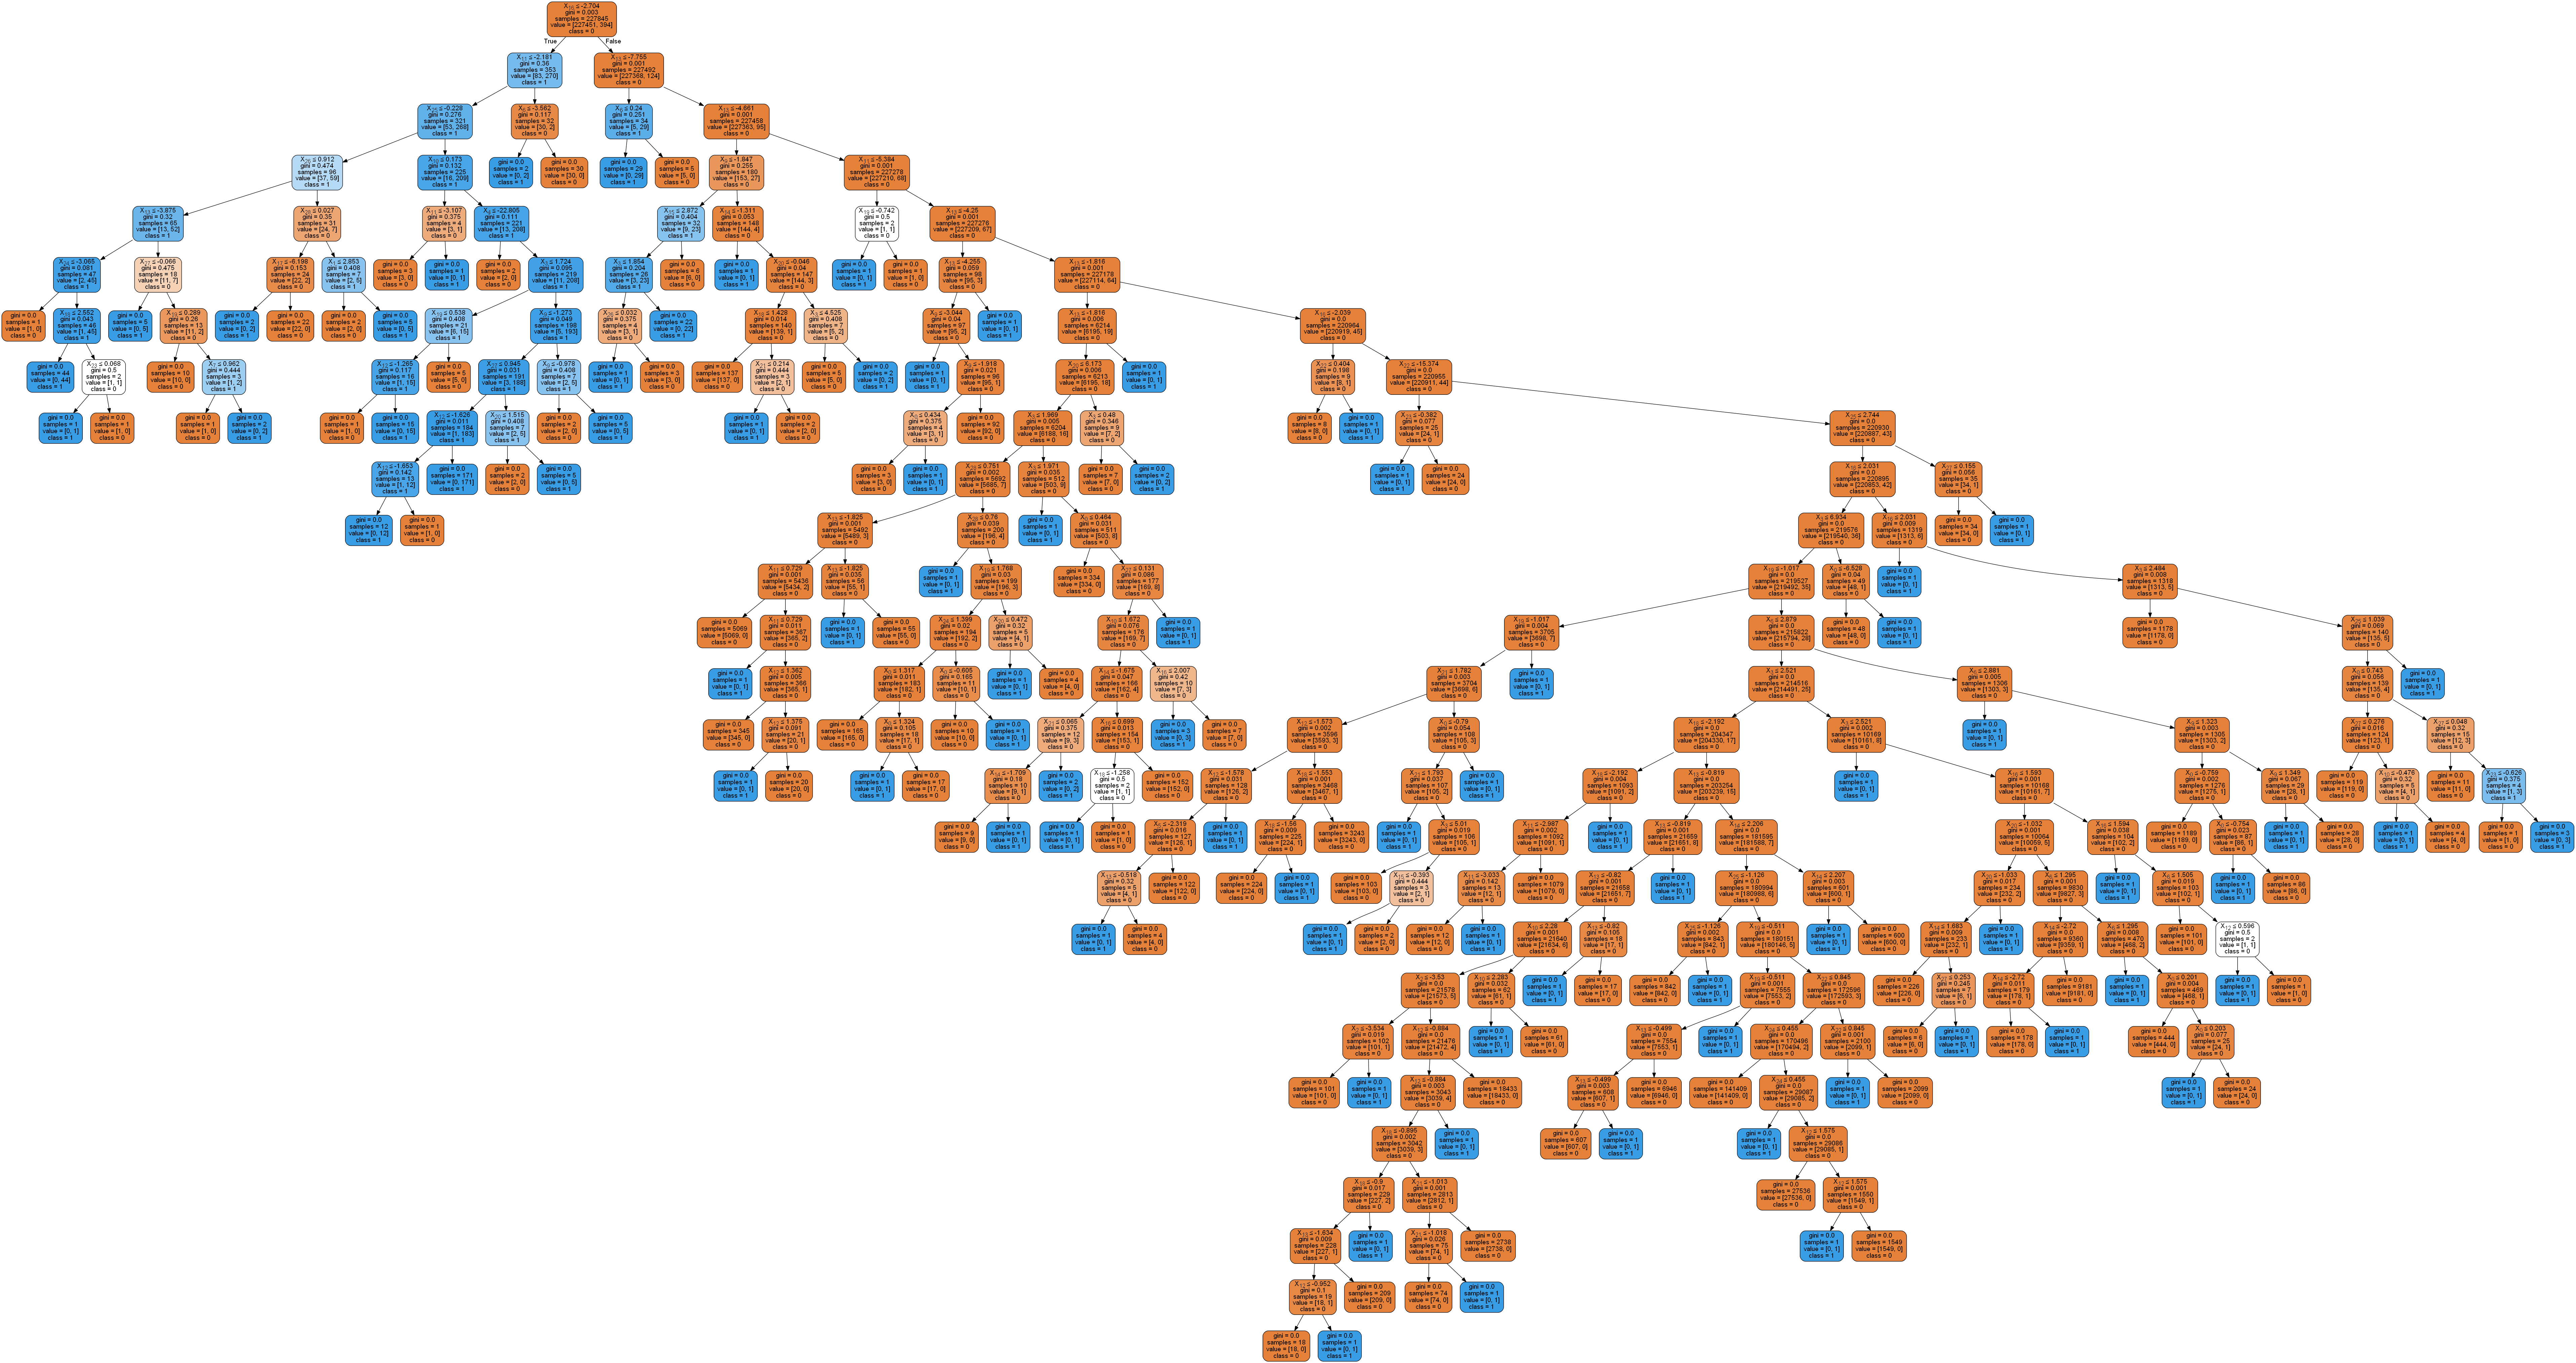

In [15]:
dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['0','1'],  
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## Quick rundown of the visualized tree
__Spitting criteria__: If the feature (Ex. V1) data lower than certain number, go to left, else go right<br>
__Gini__: Gini impurity of the node. It discribes how much the classes are mixed up.<br>
__Sample__: how many data is in the node<br>
__Value__: telling how many samples at that node fall into each category<br>
__Class__: the final label of the node

# Fine-tuning Decision Tree model

## Hyper-parameter tuning

To tune parameter, __K-fold cross validation__ is used. 5 fold is used, 10 fold is for small sample size

For this, we only consider maximum depth of the tree as other parameters are suitable. <br>
- __criterion__ : default=”gini”. (i. “gini” for the Gini impurity) (ii. “entropy” for the information gain.)
- __splitter__ :  “best” to choose the best split and “random” to choose the best random split.
- __max_depth__ : int or None, optional (default=None) If None, then nodes are expanded until all leaves are pure
- __min_samples_split__ : int, optional (default=2). Minimum number of samples required to split an internal node:
- __max_features__ : int, optional (default=None) The number of features to consider when looking for the best split:

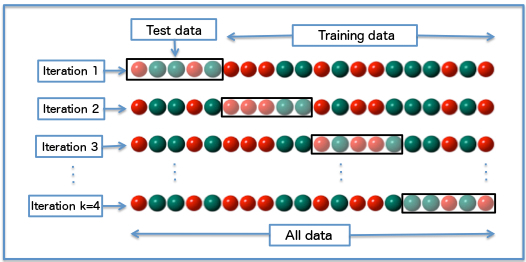

In [16]:
# perform 5-fold cross validation, from range 3 to 23
max_depth = range(3, 23)
cv_scores = []

for depth in max_depth:
    print("Number of depth", depth)
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=5, scoring='precision', n_jobs=-1)
    cv_scores.append(scores.mean())
    

Number of depth 3
Number of depth 4
Number of depth 5
Number of depth 6
Number of depth 7
Number of depth 8
Number of depth 9
Number of depth 10
Number of depth 11
Number of depth 12
Number of depth 13
Number of depth 14
Number of depth 15
Number of depth 16
Number of depth 17
Number of depth 18
Number of depth 19
Number of depth 20
Number of depth 21
Number of depth 22


In [17]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_depth = max_depth[MSE.index(min(MSE))]
print('\nThe optimal number of depth is %d.' % optimal_depth)



The optimal number of depth is 7.


Text(0,0.5,'Average Precision')

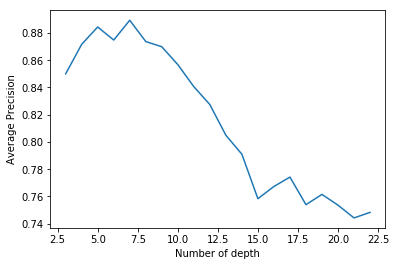

In [18]:
plt.plot(max_depth, cv_scores)
plt.xlabel('Number of depth')
plt.ylabel('Average Precision')


A function __Grid Search__ is used to find best parameter between scores metrics <br>
In basic sense, it is a brute force method to estimate hyperparameters by test each and every combination <br>
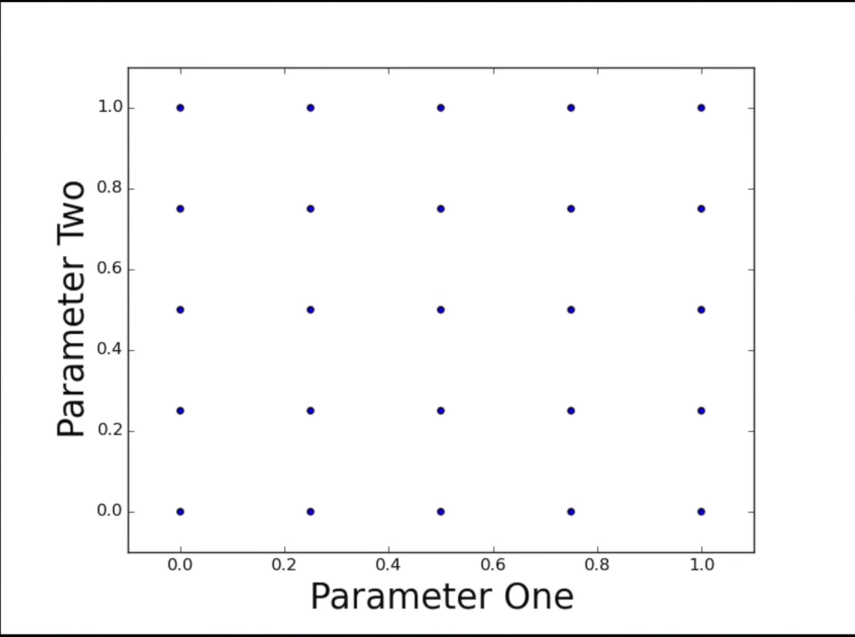

Also uses Stratified K Fold cross validation. <br>
Stratification is the process of rearranging the data as to ensure each fold is a good representative of the whole.<br>
For example in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances <br>

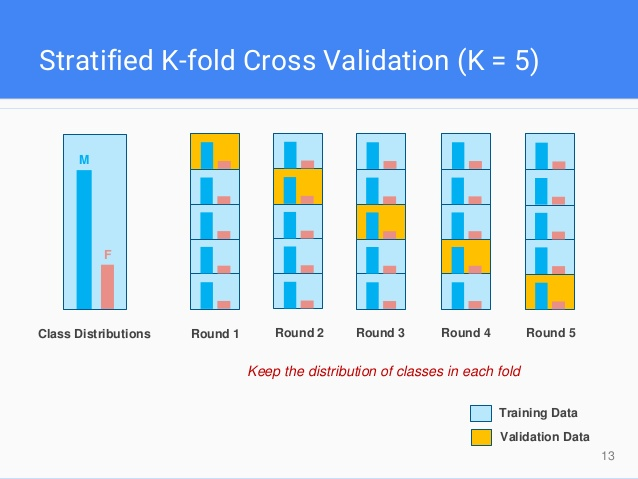

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}
parameters = {'max_depth':np.arange(3,23)}
skf = StratifiedKFold(n_splits=5)


In [20]:
grid_search = GridSearchCV(model, parameters, scoring=scorers, refit='precision_score',
                           cv=skf, return_train_score=True, n_jobs=-1)
    
grid_search.fit(X = x_train, y = y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22])},
       pre_dispatch='2*n_jobs', refit='precision_score',
       return_train_score=True,
       scoring={'precision_score': make_scorer(precision_score), 'recall_score': make_scorer(recall_score), 'accuracy_score': make_scorer(accuracy_score)},
       verbose=0)

In [21]:
print (grid_search.best_score_, grid_search.best_params_)
grid_search.best_estimator_


0.9032540131472955 {'max_depth': 7}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Retrain with best parameter

In [22]:
model = grid_search.best_estimator_
model.fit(x_train, y_train.values.ravel())

y_prediction = model.predict(x_test)


## Evaluating Fine-tuned Decision Tree model Performance

In [23]:
dt_accuracy_score = accuracy_score(y_test, y_prediction) * 100
dt_precison_score = precision_score(y_test, y_prediction) * 100
dt_recall_score = recall_score(y_test, y_prediction) * 100
dt_f1_score = f1_score(y_test, y_prediction) * 100

print("Scores in %")
print("===============================")
print("Accuracy : ", dt_accuracy_score)
print("Precison : ", dt_precison_score)
print("Recall   : ", dt_recall_score)
print("F1       : ", dt_f1_score)


Scores in %
Accuracy :  99.94557775359011
Precison :  88.50574712643679
Recall   :  78.57142857142857
F1       :  83.24324324324324


In [24]:
print('---Classification Report---')
print(classification_report(y_test, y_prediction))

print("Model Mean Absolute Error {}".format(mean_absolute_error(y_test, y_prediction)))


---Classification Report---
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     56864
          1       0.89      0.79      0.83        98

avg / total       1.00      1.00      1.00     56962

Model Mean Absolute Error 0.000544222464098873


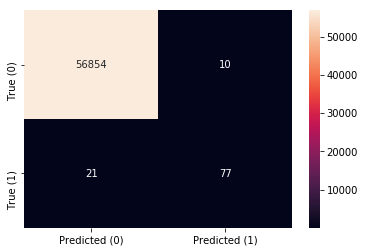

In [25]:
# Generate confusion matrix
cfm = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cfm, index = ['True (0)', 'True (1)'])
df_cm.columns = ['Predicted (0)', 'Predicted (1)']
sns.heatmap(df_cm, annot=True, fmt="d")

tn = cfm[0][0]
fp = cfm[0][1]
tp = cfm[1][1]
fn = cfm[1][0]


In [26]:
# Use cross-validation to check over-fitting

precision = cross_val_score(model, features, target, cv=5, scoring='precision', n_jobs=-1)
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))


Precision: 0.82 (+/- 0.29)


### Plot precision-recall curve
predict_proba is to calculate the posterior probability of the class label <br>
For example, if the probability of occurance of 0 is 0.237, then 1 is 0.762

Text(0.5,1,'2-class Precision-Recall curve: AP=0.74')

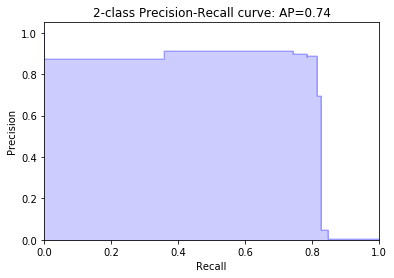

In [27]:
probas = model.predict_proba(x_test)[:,-1]
average_precision = average_precision_score(y_test, probas)
precision, recall, _ = precision_recall_curve(y_test, probas)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


### Plot learning curve

<module 'matplotlib.pyplot' from 'd:\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

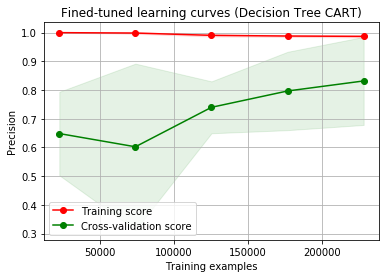

In [28]:
title = "Fined-tuned learning curves (Decision Tree CART)"
estimator = model
plot_learning_curve(estimator, title, features, target, cv=5, n_jobs= -1)


# Create a visualization for fine-tuned Decision Tree model 

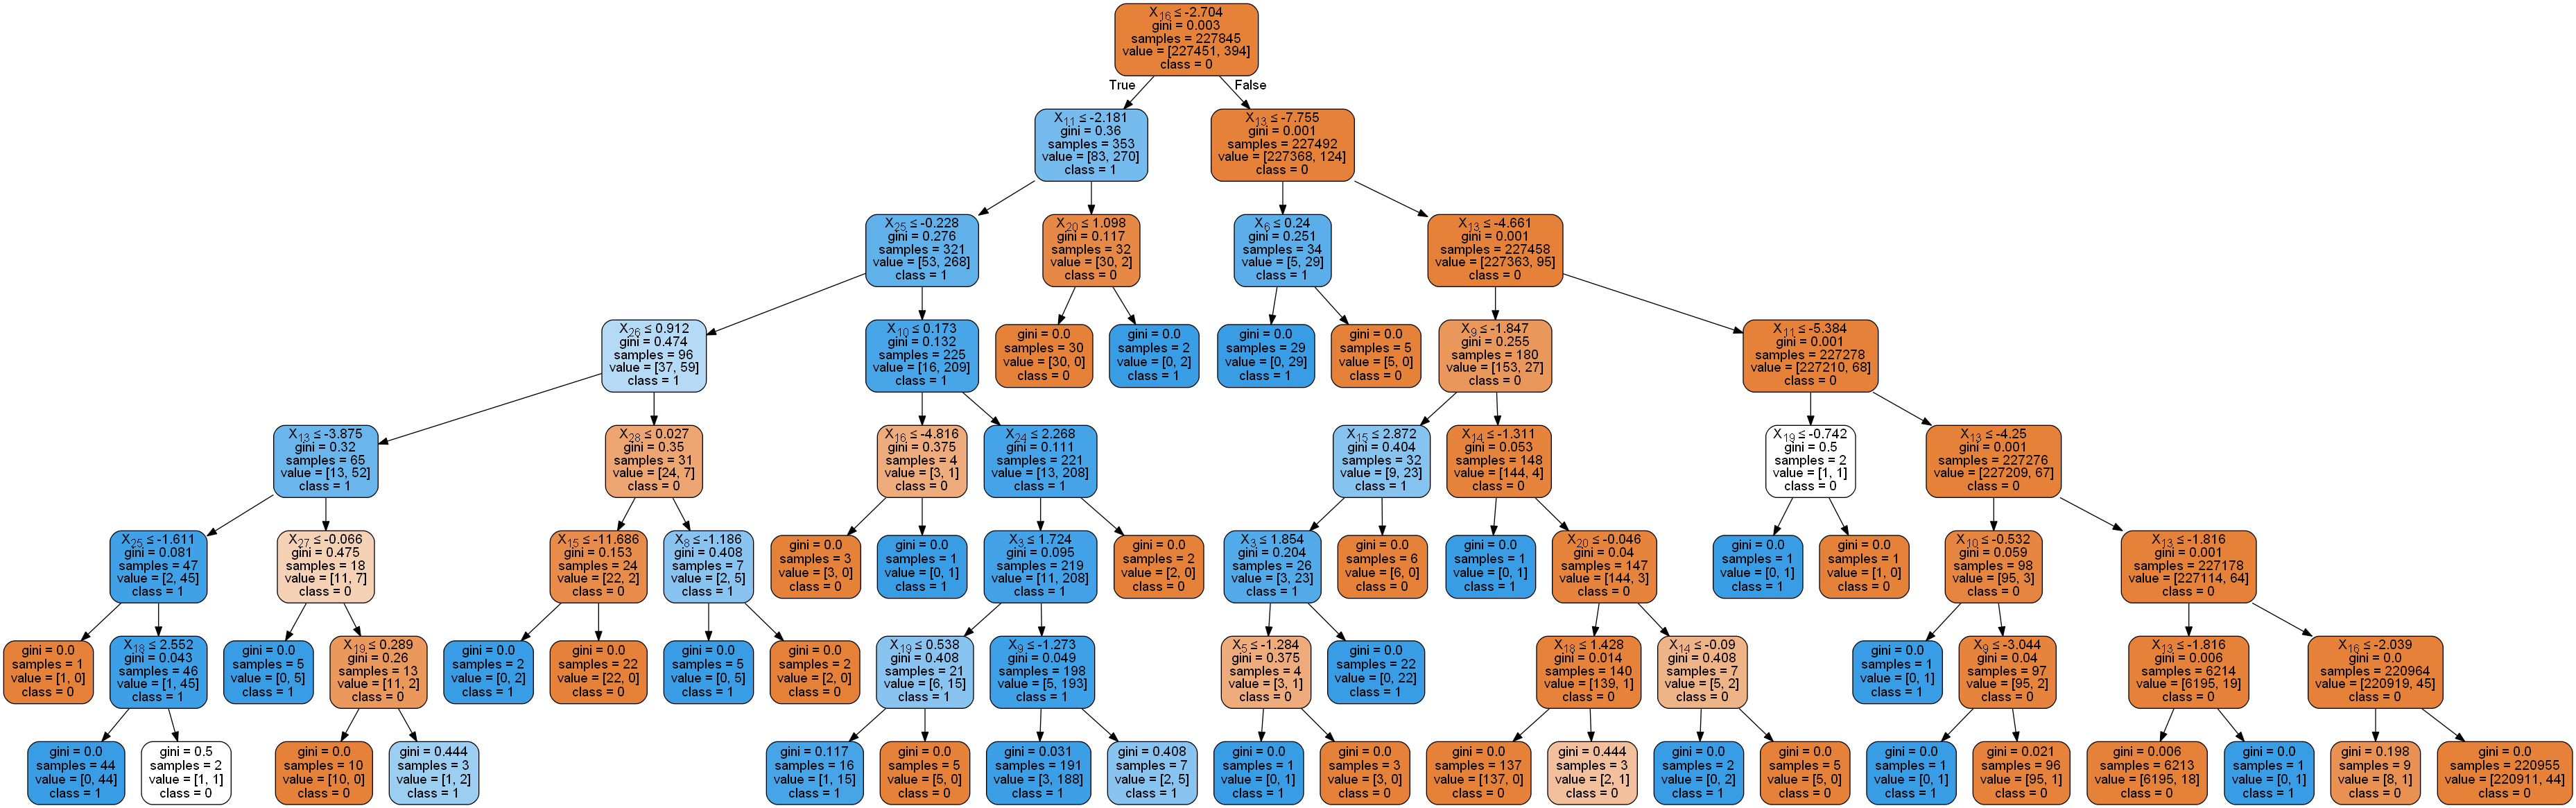

In [29]:
dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                class_names=['0','1'],  
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Print decision rules

In [30]:
from sklearn.tree import _tree

def find_rules(tree, features):
    dt = tree.tree_
    
    def visitor(node, depth):
        indent = ' ' * depth
        if dt.feature[node] != _tree.TREE_UNDEFINED:
            print('{}if <{}> <= {}: '.format(indent, features[node], round(dt.threshold[node], 2)))
            visitor(dt.children_left[node], depth + 1)
            print('{}else: '.format(indent))
            visitor(dt.children_right[node], depth + 1)
        else:
            target = dt.value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = model.classes_[i]
                target_count = int(v)
                print("{}return ".format(indent) + str(target_name) + " ( " + str(target_count) + " examples )")
    visitor(0,1)
    

In [31]:
find_rules(model, model.tree_.feature)

 if <16> <= -2.7: 
  if <11> <= -2.18: 
   if <25> <= -0.23: 
    if <26> <= 0.91: 
     if <13> <= -3.87: 
      if <25> <= -1.61: 
       return 0 ( 1 examples )
      else: 
       if <18> <= 2.55: 
        return 1 ( 44 examples )
       else: 
        return 0 ( 1 examples )
        return 1 ( 1 examples )
     else: 
      if <27> <= -0.07: 
       return 1 ( 5 examples )
      else: 
       if <19> <= 0.29: 
        return 0 ( 10 examples )
       else: 
        return 0 ( 1 examples )
        return 1 ( 2 examples )
    else: 
     if <28> <= 0.03: 
      if <15> <= -11.69: 
       return 1 ( 2 examples )
      else: 
       return 0 ( 22 examples )
     else: 
      if <8> <= -1.19: 
       return 1 ( 5 examples )
      else: 
       return 0 ( 2 examples )
   else: 
    if <10> <= 0.17: 
     if <16> <= -4.82: 
      return 0 ( 3 examples )
     else: 
      return 1 ( 1 examples )
    else: 
     if <24> <= 2.27: 
      if <3> <= 1.72: 
       if <19> <= 0.54: 
        retur

In [ ]:
from sklearn_porter import Porter

porter = Porter(model, language='java')
output = porter.export()

# Embededd the if else rule data inside java class
# output = porter.export(embed_data=True)

# Export the if else rule data as json file
# output = porter.export(export_data=True)

print(output)

## Save classifier, then compile it using javac -cp . DecisionTreeClassifier.java

In [ ]:
with open('DecisionTreeClassifier.java', 'w') as f:
    f.write(output)

## Export the test set and test the prediction whether it is true or not

In [ ]:
test_set = pd.concat([x_test,y_test], axis=1)
test_set.to_csv(r'test set.csv')

## Run classification: java DecisionTreeClassifier 1 2 3 4 5....

# Export the ML Model with Joblib